In [29]:

# Kaustav Vats (2016048)
from __future__ import division
import numpy as np
from mnist.utils import mnist_reader
import pathlib
from math import log
from random import randint as randi
import matplotlib.pyplot as plt


In [30]:
# Load Dataset
X_train, Y_train = mnist_reader.load_mnist('mnist/data', kind='train')
X_test, Y_test = mnist_reader.load_mnist('mnist/data', kind='t10k')

def Binarize(arr):
    NewArr = np.zeros((arr.shape[0], arr.shape[1]), dtype=np.int)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i, j] <= 127:
                NewArr[i, j] = 0
            else:
                NewArr[i, j] = 1
    return NewArr

if pathlib.Path('xtrain.npy').exists():
    X_train = np.load('xtrain.npy')
else:
    X_train = Binarize(X_train)
    np.save('xtrain.npy', X_train)

if pathlib.Path('xtest.npy').exists():
    X_test = np.load('xtest.npy')
else:
    X_test = Binarize(X_test)
    np.save('xtest.npy', X_test)

def Tp(arr):
    NewArr = np.zeros((arr.shape[0], ), dtype=np.int)
    for i in range(arr.shape[0]):
        NewArr[i] = arr[i]
    return NewArr

Y_train = Tp(Y_train)



In [31]:
print(Y_train)
print("Y_train.shape: ", Y_train.shape)
print("Y_train.size: ", Y_train.size)

print(Y_test)
print("ndim: ", X_train.ndim)
print("shape:", X_train.shape)
print("size: ", X_train.size)

print("ndim: ", Y_train.ndim)
print("shape:", Y_train.shape)
print("size: ", Y_train.size)



[5 0 4 ... 5 6 8]
Y_train.shape:  (60000,)
Y_train.size:  60000
[7 2 1 ... 4 5 6]
ndim:  2
shape: (60000, 784)
size:  47040000
ndim:  1
shape: (60000,)
size:  60000


In [32]:
class NaiveBayesCustom:
    def __init__(self, ClassCount):
        self.ClassCount = ClassCount
        self.Prob = np.zeros((10, 784, 2))
        self.Pred = np.zeros(10)
        self.PredictedClass = np.zeros((10000,), dtype=np.int)
        self.ConfusionMatrix = np.zeros((10, 10), dtype=np.int)
        self.CalProb = np.zeros((10000, 10))
        
    def fit(self, x_train, y_train, class1, class2, c1ImagCount, c2ImgCount, name):
        if pathlib.Path(name).exists():
            self.Prob = np.load(name)
        else:
            print(x_train.shape[0], "x", x_train.shape[1])
            for i in range(0, x_train.shape[0]):
                if y_train[i] == class1 or y_train[i] == class2:
                    for j in range(0, x_train.shape[1]):
                        if x_train[i, j] == 0:
                            self.Prob[y_train[i], j, 0] += 1
                        else:
                            self.Prob[y_train[i], j, 1] += 1
            
            for j in range(784):
                self.Prob[class1, j, 0] = self.Prob[class1, j, 0]/c1ImagCount
                self.Prob[class1, j, 1] = self.Prob[class1, j, 1]/c1ImagCount
                self.Prob[class2, j, 0] = self.Prob[class2, j, 0]/c2ImgCount
                self.Prob[class2, j, 1] = self.Prob[class2, j, 1]/c2ImgCount

            np.save(name, self.Prob)

    def predict(self, x_test, y_test, class1, class2, c1ImgCount, c2ImgCount):
        Correct = 0
        print(x_test.shape[0], "x", x_test.shape[1])
        for i in range(x_test.shape[0]):
            self.Pred = np.zeros(10)
            if y_test[i] == class1 or y_test[i] == class2:
                for j in range(self.ClassCount):
                    num = 1.0
                    for k in range(x_test.shape[1]):
                        # print("x_test:", x_test[i, k])
                        # print(num, self.Prob[j, k, x_test[i, k]])
                        num = num*self.Prob[j, k, x_test[i, k]]
                    num = num*0.5
                    self.Pred[j] = num
                # print(self.Pred)
                if self.Pred[class1] > self.Pred[class2]:
                    self.PredictedClass[i] = class1
                else:
                    self.PredictedClass[i] = class2
                if self.PredictedClass[i] == y_test[i]:
                    Correct += 1
                
                self.Pred = self.Pred/(np.sum(self.Pred))
                # print("self.Pred avg value:", np.average(self.Pred))
                for n in range(self.ClassCount):
                    self.CalProb[i, n] = self.Pred[n]
        print(Correct/(c1ImgCount+c2ImgCount))
        return Correct/(c1ImgCount+c2ImgCount)

    # def PredictCustom(self, x_test, y_test, class1, class2, c1ImgCount, c2ImgCount):
    #     Correct = 0
    #     print(x_test.shape[0], "x", x_test.shape[1])
    #     for i in range(x_test.shape[0]):
    #         self.Pred = np.zeros(10)
    #         if y_test[i] == class1 or y_test[i] == class2:
    #             for j in range(self.ClassCount):
    #                 num = 1.0
    #                 for k in range(x_test.shape[1]):
    #                     # print("x_test:", x_test[i, k])
    #                     # print(num, self.Prob[j, k, x_test[i, k]])
    #                     num = num*self.Prob[j, k, x_test[i, k]]
    #                 num = num*0.5
    #                 self.Pred[j] = num
    #             # print(self.Pred)
    #             if self.Pred[class1] > self.Pred[class2]:
    #                 self.PredictedClass[i] = class1
    #             else:
    #                 self.PredictedClass[i] = class2
    #             if self.PredictedClass[i] == y_test[i]:
    #                 Correct += 1
                
    #             self.Pred = self.Pred/(np.sum(self.Pred))
    #             # print("self.Pred avg value:", np.average(self.Pred))
    #             for n in range(self.ClassCount):
    #                 self.CalProb[i, n] = self.Pred[n]
    #     print(Correct/(c1ImgCount+c2ImgCount))

    def ConMatrix(self, y_test):
        for i in range(y_test.shape[0]):
            self.ConfusionMatrix[y_test[i], self.PredictedClass[i]] += 1
        print(self.ConfusionMatrix)

    def PrecisionAndRecall(self):
        for i in range(self.ClassCount):
            tpfp = 0.0
            for j in range(self.ClassCount):
                tpfp += self.ConfusionMatrix[j, i]
            print("Precision for Class", i, "=", self.ConfusionMatrix[i, i]/tpfp)
            print("Recall for Class", i, "=", self.ConfusionMatrix[i, i]/1000*self.ClassCount)
            print()

    def RocCurve(self, y_test, c1, c2):
        # print(max(self.Prob[5, :, 0]))
        roc_values = np.zeros((10, 2, 1000))
        det_values = np.zeros((10, 2, 1000))
        for i in range(10):
            if i == c1 or i == c2:
                if i == c2:
                    print("yes",c2)
                Threshold = 1.0
                for k in range(1000):
                    tp = 0
                    fn = 0
                    fp = 0
                    tn = 0
                    for j in range(y_test.shape[0]):
                        classify = False
                        if ( self.CalProb[j, i] > Threshold ):
                            classify = True
                        if classify and y_test[j] == i:
                            tp += 1
                        elif classify and y_test[j] != i:
                            fp += 1
                        elif classify == False and y_test[j] == i:
                            fn += 1
                        elif classify == False and y_test[j] != i:
                            tn += 1

                    roc_values[i, 0, k] = tp/(tp+fn)
                    roc_values[i, 1, k] = fp/(tn+fp)

                    det_values[i, 0, k] = fn/(fn+tp)
                    det_values[i, 1, k] = fp/(fp+tn)

                    Threshold *= 0.7
                print("K", k)

        plt.figure()
        color = ['b', 'g', 'c', 'r', 'm', 'y', 'k', '#940445', '#42c4d3', '#ff7256']
        for i in range(10):
            if i == c2 or i == c1:
                plt.plot(roc_values[i, 1, :], roc_values[i, 0, :], color[i], label="ROC Curve for class %d " %i)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc='lower right')
        # plt.show()  
        plt.savefig("roc_q21.png")

        plt.figure()
        for i in range(10):
            if i == c2 or i == c1:
                plt.plot(det_values[i, 1, :], det_values[i, 0, :], color[i], label="DET Curve for class %d" %i)
        plt.xlabel("False Positive Rate")
        plt.ylabel("False Negative Rate")
        plt.title("DET Curve")
        plt.legend(loc='upper right')
        plt.show()  
#         plt.savefig("det_q21.png")


In [33]:

NB = NaiveBayesCustom(10)
class1 = 3
class2 = 8

count0 = 0
count1 = 0
for i in range(60000):
    if Y_train[i] == class1:
        count0 += 1
    if Y_train[i] == class2:
        count1 += 1
print(count0, count1, count0+count1)

NB.fit(X_train, Y_train, class1, class2, count0, count1, "Prob.npy")

count3 = 0
count4 = 0
for i in range(10000):
    if Y_test[i] == class1:
        count3 += 1
    if Y_test[i] == class2:
        count4 += 1
print(count3, count4, count3+count4)


6131 5851 11982
1010 974 1984


In [34]:

dataPointer = []
Partitions = []
for i in range(X_train.shape[0]):
    if Y_train[i] == class1 or Y_train[i] == class2:
        dataPointer.append(i)
    if len(dataPointer) == 2518 and len(Partitions) < 4:
        Partitions.append(dataPointer)
        dataPointer = []
Partitions.append(dataPointer)
print(len(Partitions))
# print(Partitions)


5


5162 4910 10072
[8 8 3 ... 8 3 8]
969 941 1910
1910 x 784
0.9267015706806283
10000 x 784


c:\users\kvats\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


0.9178427419354839
K 999
yes 8
K 999


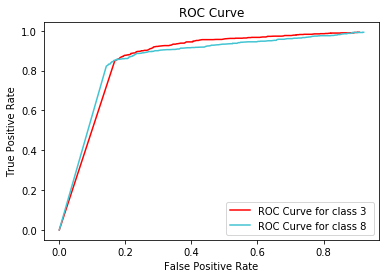

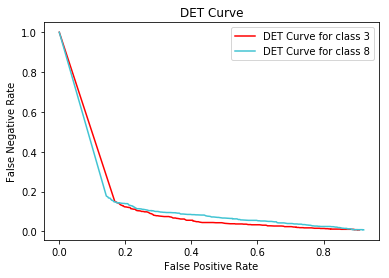

[0.9267015706806283]
[0.9178427419354839]


In [35]:

Acc = []
Acc2 = []
for i in range(5):
    if i == 4:
        OriginalClass = []
        for j in range(len(Partitions[i])):
            OriginalClass.append(Y_train[Partitions[i][j]])
            Y_train[Partitions[i][j]] = 0

        count0 = 0
        count1 = 0
        for j in range(60000):
            if Y_train[j] == class1:
                count0 += 1
            if Y_train[j] == class2:
                count1 += 1
        print(count0, count1, count0+count1)
        name = str(i+1)+"Prob.npy"
        NB.fit(X_train, Y_train, class1, class2, count0, count1, name)

        X_test_New = np.zeros((len(Partitions[i]), 784), dtype=np.int)
        Y_test_New = np.zeros((len(Partitions[i]), ), dtype=np.int)

        for k in range(len(Partitions[i])):
            for l in range(784):
                X_test_New[k, l] = X_train[Partitions[i][k], l]
            Y_test_New[k] = OriginalClass[k]
        print(Y_test_New)

        count0 = 0
        count1 = 0
        for j in range(len(Partitions[i])):
            if Y_test_New[j] == class1:
                count0 += 1
            if Y_test_New[j] == class2:
                count1 += 1
        print(count0, count1, count0+count1)

        Acc.append(NB.predict(X_test_New, Y_test_New, class1, class2, count0, count1))
        Acc2.append(NB.predict(X_test, Y_test, class1, class2, count3, count4))
        for j in range(len(Partitions[i])):
            Y_train[Partitions[i][j]] = OriginalClass[j]
        # NB.ConMatrix(Y_test_New)
        NB.RocCurve(Y_test_New, class1, class2)
print(Acc)
print(Acc2)



In [26]:
C1_Arr = []
C2_Arr = []

for i in range(Y_train.shape[0]):
    if Y_train[i] == class1:
        C1_Arr.append(i)
    if Y_train[i] == class2:
        C2_Arr.append(i)

leng = min(len(C1_Arr), len(C2_Arr))
print("Lenght min", leng, len(C1_Arr)+len(C2_Arr))

leng = leng-1
print("New Leng", leng)

for i in range(Y_train.shape[0]):
    if Y_train[i] == class1:
        if i not in C1_Arr:
            Y_train[i] = 0
    if Y_train[i] == class2:
        if i not in C2_Arr:
            Y_train[i] = 0


Lenght min 5851 11982
New Leng 5850


In [27]:
Partitions = []
k = 0
for i in range(5):
    dataPointer = []
    for j in range(1170):
        dataPointer.append(C1_Arr[k])
        dataPointer.append(C2_Arr[k])
        k += 1
    Partitions.append(dataPointer)
print(k)
print(len(Partitions), len(Partitions[0]))


5850
5 2340


2340 x 784
0.3818376068376068
10000 x 784


c:\users\kvats\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


0.7444556451612904
K 999
yes 8
K 999
[0.3818376068376068]
[0.7444556451612904]


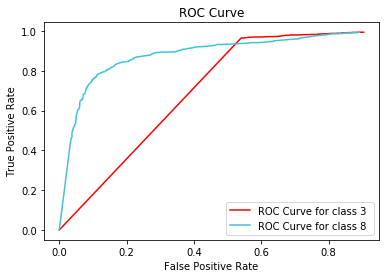

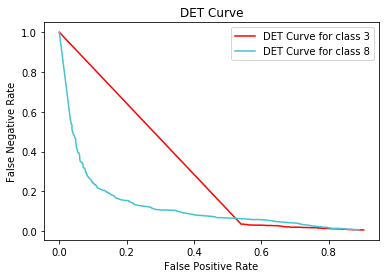

In [28]:

Acc3 = []
Acc4 = []
for i in range(5):
    if i == 0:
        OriginalClass = []
        for j in range(len(Partitions[i])):
            OriginalClass.append(Y_train[Partitions[i][j]])
            Y_train[Partitions[i][j]] = 0

        count0 = 5850
        count1 = 5850
        name = str(i+10)+"Prob.npy"
        NB.fit(X_train, Y_train, class1, class2, count0, count1, name)

        X_test_New = np.zeros((len(Partitions[i]), 784), dtype=np.int)
        Y_test_New = np.zeros((len(Partitions[i]), ), dtype=np.int)

        for k in range(len(Partitions[i])):
            for l in range(784):
                X_test_New[k, l] = X_train[Partitions[i][k], l]
            Y_test_New[k] = OriginalClass[k]

        count0 = 2340
        count1 = 2340

        Acc3.append(NB.predict(X_test_New, Y_test_New, class1, class2, count0, count1))
        Acc4.append(NB.predict(X_test, Y_test, class1, class2, count3, count4))
        for j in range(len(Partitions[i])):
            Y_train[Partitions[i][j]] = OriginalClass[j]
        NB.RocCurve(Y_test_New, class1, class2)

print(Acc3)
print(Acc4)

